<a href="https://www.kaggle.com/code/ethanwitek/example-notebook-0-1?scriptVersionId=224137683" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <span style="color:forestgreen;">Introduction</span>

---

This is an example notebook for my [Chess.com Grandmaster Matches 2024 (Rated) Dataset](https://www.kaggle.com/datasets/ethanwitek/chess-com-grandmaster-matches-2024). In this notebook, I will be pursuing the answers to the following three research questions:
1. What is the most common opening Grandmasters used in this dataset?
2. Which Grandmaster has the most wins in this dataset?
3. How does time control affect the <u>average</u> accuracy of Grandmasters' moves in this dataset?

I have also included follow-up questions for each above to illustrate how conclusions may lead to further analysis. These questions (respectively) are:

1. What percentage of games in this dataset had this opening?
2. What percentage of their games in this dataset did they win?
3. What if we wanted to do the same analysis, but show the accuracy for white's moves <u>in comparison</u> to black's moves rather than just the average accuracy?

In [1]:
# Imports
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
chess_df = pd.read_csv("/kaggle/input/chess-com-grandmaster-matches-2024/gm-rated-2024.csv")
chess_df.head()

,white_res,white_user,white_elo,white_acc,black_res,black_user,black_elo,black_acc,time_control,time_class,opening,date
0,win,0blivi0usspy,2931,86.4,timeout,alexrustemov,2864,81.8,180,blitz,https://www.chess.com/openings/English-Opening...,2024-12
1,win,0blivi0usspy,2853,-1.0,checkmated,mgeli,2732,-1.0,180,blitz,https://www.chess.com/openings/Sicilian-Defens...,2024-12
2,resigned,0blivi0usspy,2866,92.9,win,alexrustemov,2897,98.3,180,blitz,https://www.chess.com/openings/London-System.....,2024-12
3,win,0blivi0usspy,2838,-1.0,abandoned,scrapnel,2740,-1.0,180,blitz,https://www.chess.com/openings/Queens-Indian-D...,2024-12
4,win,0blivi0usspy,2852,-1.0,resigned,mjray79,2846,-1.0,180,blitz,https://www.chess.com/openings/Caro-Kann-Defen...,2024-12


## <span style="color:forestgreen;">Example #1</span>

---

**<u>Question:</u>** What is the most common opening Grandmasters used in this dataset?

In [3]:
opening_group = chess_df.groupby("opening").agg("count").reset_index()
opening_group

,opening,white_res,white_user,white_elo,white_acc,black_res,black_user,black_elo,black_acc,time_control,time_class,date
0,https://www.chess.com/openings/Alapin-Sicilian...,2,2,2,2,2,2,2,2,2,2,2
1,https://www.chess.com/openings/Alapin-Sicilian...,2,2,2,2,2,2,2,2,2,2,2
2,https://www.chess.com/openings/Alapin-Sicilian...,4,4,4,4,4,4,4,4,4,4,4
3,https://www.chess.com/openings/Alapin-Sicilian...,12,12,12,12,12,12,12,12,12,12,12
4,https://www.chess.com/openings/Alapin-Sicilian...,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
7281,https://www.chess.com/openings/Vienna-Game-Max...,4,4,4,4,4,4,4,4,4,4,4
7282,https://www.chess.com/openings/Vienna-Game-Oma...,6,6,6,6,6,6,6,6,6,6,6
7283,https://www.chess.com/openings/Ware-Opening,24,24,24,24,24,24,24,24,24,24,24
7284,https://www.chess.com/openings/Ware-Opening-1....,2,2,2,2,2,2,2,2,2,2,2


In [4]:
opening_sorted = opening_group.sort_values("white_res", ascending=False).reset_index(drop=True)
opening_sorted.head(1)

,opening,white_res,white_user,white_elo,white_acc,black_res,black_user,black_elo,black_acc,time_control,time_class,date
0,https://www.chess.com/openings/Trompowsky-Atta...,132,132,132,132,132,132,132,132,132,132,132


In [5]:
most_played = opening_sorted.loc[0, "opening"]
print(most_played)

https://www.chess.com/openings/Trompowsky-Attack-2...d5-3.Nd2-c5


**<u>Answer:</u>** On Chess.com, the most-played opening in games between two Grandmasters was [this variation](https://www.chess.com/openings/Trompowsky-Attack-2...d5-3.Nd2-c5) of the "Trompowsky Attack".

**<u>Follow-up question:</u>** What percentage of games in this dataset had this opening?

In [6]:
opening_ratio = chess_df[chess_df["opening"] == most_played].shape[0] / chess_df.shape[0]
print(opening_ratio)

0.0045865184155663655


**<u>Follow-up answer:</u>** Approximately 0.46% of games in this dataset were played with this opening.

## <span style="color:forestgreen;">Example #2</span>

---

**<u>Question:</u>** Which Grandmaster has the most wins in this dataset?



In [7]:
white_df = chess_df.loc[:,["white_user","white_res"]]
white_df["white_win"] = white_df["white_res"].apply(lambda x: x == "win")
wdf_filter = white_df.loc[:,["white_user","white_win"]]
wdf_grouped = wdf_filter.groupby("white_user").agg("sum").reset_index()
wdf_grouped # Dataframe with users and their number of wins playing as white

,white_user,white_win
0,0blivi0usspy,70
1,2bf41-0,24
2,abhidabhi,14
3,abykhovsky,100
4,aceontheturn,50
...,...,...
230,xiaotong2008,42
231,xxysoul6,6
232,yobdc,10
233,zubridis,0


In [8]:
black_df = chess_df.loc[:,["black_user","black_res"]]
black_df["black_win"] = black_df["black_res"].apply(lambda x: x == "win")
bdf_filter = black_df.loc[:,["black_user","black_win"]]
bdf_grouped = bdf_filter.groupby("black_user").agg("sum").reset_index()
bdf_grouped # Dataframe with users and their number of wins playing as black

,black_user,black_win
0,0blivi0usspy,42
1,2bf41-0,10
2,abhidabhi,22
3,abykhovsky,98
4,aceontheturn,54
...,...,...
230,xiaotong2008,48
231,xxysoul6,14
232,yobdc,8
233,zubridis,2


In [9]:
win_df = pd.merge(wdf_grouped, bdf_grouped, how="outer", left_on="white_user",
                  right_on="black_user")
win_df = win_df.fillna(0) # Grandmasters who only played as one color against other Grandmasters
win_df

,white_user,white_win,black_user,black_win
0,0blivi0usspy,70.0,0blivi0usspy,42.0
1,2bf41-0,24.0,2bf41-0,10.0
2,abhidabhi,14.0,abhidabhi,22.0
3,abykhovsky,100.0,abykhovsky,98.0
4,aceontheturn,50.0,aceontheturn,54.0
...,...,...,...,...
239,xiaotong2008,42.0,xiaotong2008,48.0
240,xxysoul6,6.0,xxysoul6,14.0
241,yobdc,10.0,yobdc,8.0
242,zubridis,0.0,zubridis,2.0


In [10]:
win_df["wins"] = win_df["white_win"] + win_df["black_win"]
win_df["user"] = win_df["white_user"]
win_df = win_df.loc[:, ["user", "wins"]]
win_df = win_df.sort_values("wins", ascending=False).reset_index(drop=True)
win_df

,user,wins
0,alexrustemov,1630.0
1,mishanick,1070.0
2,nihalsarin,1056.0
3,legendisback1,990.0
4,wonderfultime,842.0
...,...,...
239,publicaccountcze,0.0
240,skzt,0.0
241,0,0.0
242,sergey071164,0.0


**<u>Answer:</u>** Grandmaster `alexrustemov` has the most wins in this dataset.

**<u>Follow-up question:</u>** What percentage of their games in this dataset did they win?

In [11]:
user_df = chess_df[(chess_df["white_user"] == "alexrustemov") 
                    | (chess_df["black_user"] == "alexrustemov")]
user_df

,white_res,white_user,white_elo,white_acc,black_res,black_user,black_elo,black_acc,time_control,time_class,opening,date
0,win,0blivi0usspy,2931,86.4,timeout,alexrustemov,2864,81.8,180,blitz,https://www.chess.com/openings/English-Opening...,2024-12
2,resigned,0blivi0usspy,2866,92.9,win,alexrustemov,2897,98.3,180,blitz,https://www.chess.com/openings/London-System.....,2024-12
6,resigned,0blivi0usspy,2827,-1.0,win,alexrustemov,2911,-1.0,180,blitz,https://www.chess.com/openings/French-Defense-...,2024-09
14,win,0blivi0usspy,2931,86.4,timeout,alexrustemov,2864,81.8,180,blitz,https://www.chess.com/openings/English-Opening...,2024-12
17,win,0blivi0usspy,2871,-1.0,resigned,alexrustemov,2837,-1.0,180,blitz,https://www.chess.com/openings/Modern-Defense-...,2024-11
...,...,...,...,...,...,...,...,...,...,...,...,...
28429,win,xiaotong2008,2984,84.6,resigned,alexrustemov,2821,76.8,180,blitz,https://www.chess.com/openings/French-Defense-...,2024-10
28447,repetition,xiaotong2008,3105,-1.0,repetition,alexrustemov,2835,-1.0,180+1,blitz,https://www.chess.com/openings/English-Opening...,2024-12
28452,repetition,xiaotong2008,3105,-1.0,repetition,alexrustemov,2835,-1.0,180+1,blitz,https://www.chess.com/openings/English-Opening...,2024-12
28538,win,yobdc,2617,94.5,timeout,alexrustemov,2877,87.6,180+1,blitz,https://www.chess.com/openings/French-Defense-...,2024-09


In [12]:
user_wins = win_df.loc[win_df["user"] == "alexrustemov", "wins"].values[0]
user_wins

1630.0

In [13]:
print(user_wins / user_df.shape[0])

0.3545019573727708


**<u>Follow-up answer:</u>** `alexrustemov` won approximately 35.45% of their matches in this dataset.

## <span style="color:forestgreen;">Example #3</span>

---

**<u>Question:</u>** How does time control affect the <u>average</u> accuracy of Grandmasters' moves in this dataset?



In [14]:
df_acc_filter = chess_df[["white_acc", "black_acc", "time_control"]]
df_acc_filter

,white_acc,black_acc,time_control
0,86.4,81.8,180
1,-1.0,-1.0,180
2,92.9,98.3,180
3,-1.0,-1.0,180
4,-1.0,-1.0,180
...,...,...,...
28775,-1.0,-1.0,60
28776,-1.0,-1.0,60
28777,-1.0,-1.0,60
28778,-1.0,-1.0,60


In [15]:
# Remove games where accuracy wasn't calculated
df_acc = df_acc_filter[(df_acc_filter["white_acc"] != -1) & (df_acc_filter["black_acc"] != -1)]
df_acc

,white_acc,black_acc,time_control
0,86.4,81.8,180
2,92.9,98.3,180
5,94.1,78.8,180
7,91.2,77.7,180
8,98.3,86.5,180
...,...,...,...
28753,93.6,83.9,60
28754,93.1,80.7,60
28757,75.7,75.3,60
28762,93.7,94.0,60


In [16]:
df_acc["time_control"].unique()

array(['180', '180+2', '60', '180+1', '600+2', '30', '300+2', '60+1',
       '30+1', '1/259200', '420+3', '900+10', '910', '600'], dtype=object)

In [17]:
tc_usage = df_acc["time_control"].value_counts().reset_index()
tc_usage

,time_control,count
0,180,11821
1,60,1902
2,180+1,1882
3,600+2,482
4,30,290
5,180+2,44
6,300+2,34
7,420+3,10
8,30+1,8
9,60+1,6


Some `time_control`s may not be played very often. I will remove any `time_control` settings that are not used in at least 10 matches, since they may be potentially misleading in my visualizations.

In [18]:
low_use_tc = tc_usage[tc_usage["count"] < 10]
low_use_list = low_use_tc["time_control"].to_list()
low_use_list

['30+1', '60+1', '900+10', '1/259200', '910', '600']

In [19]:
df_acc = df_acc.loc[~df_acc["time_control"].isin(low_use_list)]
df_acc

,white_acc,black_acc,time_control
0,86.4,81.8,180
2,92.9,98.3,180
5,94.1,78.8,180
7,91.2,77.7,180
8,98.3,86.5,180
...,...,...,...
28753,93.6,83.9,60
28754,93.1,80.7,60
28757,75.7,75.3,60
28762,93.7,94.0,60


In [20]:
tc_grouped = df_acc.groupby("time_control").agg("mean").reset_index()
tc_grouped

,time_control,white_acc,black_acc
0,180,85.368294,84.634912
1,180+1,86.487088,85.735175
2,180+2,89.522727,89.322727
3,30,77.350345,76.511034
4,300+2,86.129412,87.700000
5,420+3,85.320000,88.720000
6,60,82.114301,81.410831
7,600+2,89.441909,88.532365


I wish to visualize how increasing "time given" for players' moves affects the "average accuracy" of each player. To accomplish this, I will sort my current dataframe by the initial time given as well as by the incremented time given. For example:
* A `time_control` of "180" means "180 minutes given to each player"
* A `time_control` of "180+3" means "180 minutes, plus 3 additional minutes per move made, given to each player
* A `time_control` of "30" means "30 minutes given to each player"

So, if I were to sort these three `time_control`s, I would end up with the order:
**<center>(least) 30 -> 180 -> 180+3 (greatest)</center>**

In [21]:
# Helper function for converting string-based time_control into numeric for sorting
def get_numeric(time_control):
    if "+" in time_control:
        vals = time_control.split("+")
        return (int(vals[0]) + int(vals[1]))
    else:
        return int(time_control)

In [22]:
tc_grouped["tc_numeric"] = tc_grouped["time_control"].apply(lambda x: get_numeric(x))
tc_grouped

,time_control,white_acc,black_acc,tc_numeric
0,180,85.368294,84.634912,180
1,180+1,86.487088,85.735175,181
2,180+2,89.522727,89.322727,182
3,30,77.350345,76.511034,30
4,300+2,86.129412,87.700000,302
5,420+3,85.320000,88.720000,423
6,60,82.114301,81.410831,60
7,600+2,89.441909,88.532365,602


In [23]:
tc_grouped = tc_grouped.sort_values("tc_numeric").reset_index(drop=True)
tc_grouped

,time_control,white_acc,black_acc,tc_numeric
0,30,77.350345,76.511034,30
1,60,82.114301,81.410831,60
2,180,85.368294,84.634912,180
3,180+1,86.487088,85.735175,181
4,180+2,89.522727,89.322727,182
5,300+2,86.129412,87.700000,302
6,420+3,85.320000,88.720000,423
7,600+2,89.441909,88.532365,602


In [24]:
tc_grouped["avg_acc"] = round((tc_grouped["white_acc"] + tc_grouped["black_acc"]) / 2, 2)
tc_grouped

,time_control,white_acc,black_acc,tc_numeric,avg_acc
0,30,77.350345,76.511034,30,76.93
1,60,82.114301,81.410831,60,81.76
2,180,85.368294,84.634912,180,85.00
3,180+1,86.487088,85.735175,181,86.11
4,180+2,89.522727,89.322727,182,89.42
5,300+2,86.129412,87.700000,302,86.91
6,420+3,85.320000,88.720000,423,87.02
7,600+2,89.441909,88.532365,602,88.99


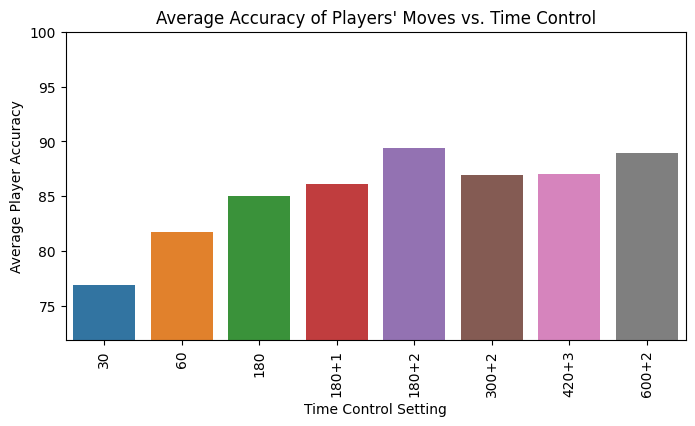

In [25]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="time_control", y="avg_acc", data=tc_grouped)
plt.title("Average Accuracy of Players' Moves vs. Time Control")
plt.ylim([min(tc_grouped["avg_acc"]) - 5, 100])
plt.xlabel("Time Control Setting")
plt.xticks(rotation=90, ha="center")
plt.ylabel("Average Player Accuracy")
plt.show()

**<u>Answer:</u>** It appears that the average accuracy of players' moves in this dataset increases slightly* when players are given more time.

*Disclaimer: This does not mean that "giving more time to players" will always increase players' move accuracy. It only means we *expect* the average accuracy of moves to increase when players are given more time.

**<u>Follow-up question:</u>** What if we wanted to do the same analysis, but show the accuracy for white's moves <u>in comparison</u> to black's moves rather than just the average accuracy?

In [26]:
tc_melted = pd.melt(tc_grouped, id_vars=["time_control"], value_vars=["white_acc", "black_acc"],
                   var_name="pieces", value_name="accuracy")
tc_melted

,time_control,pieces,accuracy
0,30,white_acc,77.350345
1,60,white_acc,82.114301
2,180,white_acc,85.368294
3,180+1,white_acc,86.487088
4,180+2,white_acc,89.522727
5,300+2,white_acc,86.129412
6,420+3,white_acc,85.320000
7,600+2,white_acc,89.441909
8,30,black_acc,76.511034
9,60,black_acc,81.410831


In [27]:
tc_melted["pieces"] = tc_melted["pieces"].replace({"white_acc": "White", "black_acc": "Black"})
tc_melted["accuracy"] = round(tc_melted["accuracy"], 2)
tc_melted

,time_control,pieces,accuracy
0,30,White,77.35
1,60,White,82.11
2,180,White,85.37
3,180+1,White,86.49
4,180+2,White,89.52
5,300+2,White,86.13
6,420+3,White,85.32
7,600+2,White,89.44
8,30,Black,76.51
9,60,Black,81.41


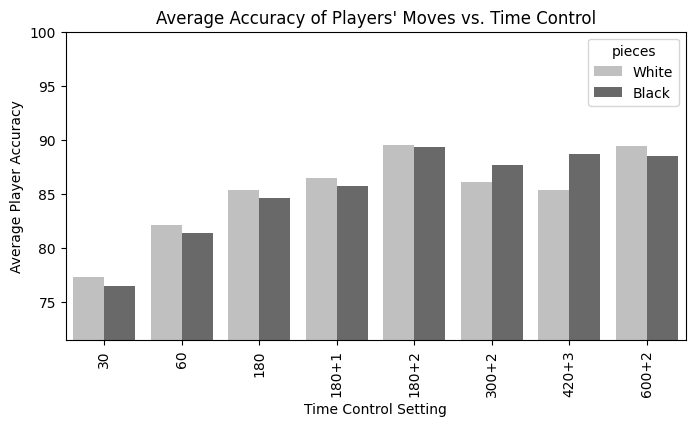

In [28]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="time_control", y="accuracy", hue="pieces", palette=["silver", "dimgray"],
                 data=tc_melted)
plt.title("Average Accuracy of Players' Moves vs. Time Control")
plt.ylim([min(tc_melted["accuracy"]) - 5, 100])
plt.xlabel("Time Control Setting")
plt.xticks(rotation=90, ha="center")
plt.ylabel("Average Player Accuracy")
plt.show()

**<u>Follow-up answer:</u>** The relationship between "time given" to players and "average player accuracy" is positive both with the white pieces and with the black pieces.